In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluation: The homogeneous multiprocessor scenario

In [2]:
#Path to the Github repo in your computer (https://github.com/muuurk/partitioned_scheduling_on_RT-FaaS)
REPO_PATH = "/home/szalay/projects/partitioned_scheduling_on_RT-FaaS"

# Algorithm to examine. 
# Possible values: ALG1 (ALG in the paper), FFD (FFD in the paper), BR (BR in the paper) and DBR (EBR in the paper)
ALGORITHMS = ["ALG1", "FFD", "BR", "DBR"]

Processing file /home/szalay/projects/partitioned_scheduling_on_RT-FaaS/cloud2021_paper_materials/dataset_paper/homogen_tests_matrix_10x100.csv
Processing file /home/szalay/projects/partitioned_scheduling_on_RT-FaaS/cloud2021_paper_materials/dataset_paper/homogen_tests_matrix_50x100.csv
Processing file /home/szalay/projects/partitioned_scheduling_on_RT-FaaS/cloud2021_paper_materials/dataset_paper/homogen_tests_matrix_100x100.csv


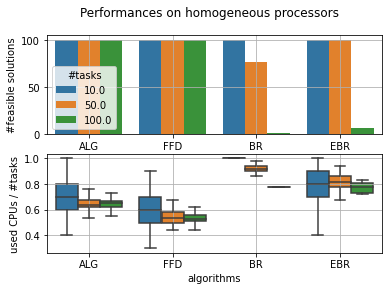

In [3]:
def get_index(values, value):
    return values.index(value)

df_for_fig = pd.DataFrame(columns=['algorithm'])
df_for_fig2 = pd.DataFrame(columns=['algorithm'])

matrix_sizes = [(10,100), (50,100), (100,100)]
for matrix_size in matrix_sizes:
    for sim_group in range(1):

        file_name = '{}/cloud2021_paper_materials/dataset_paper/homogen_tests_matrix_{}x{}.csv'.format(REPO_PATH, matrix_size[0],matrix_size[1])
        print("Processing file {}".format(file_name))
        df = pd.read_csv(file_name)

        for alg in ALGORITHMS:
            df_filtered = df.iloc[:,[get_index(list(df.columns),alg)]]
            df_filtered = df_filtered.rename(columns={alg: "used_bins"})

            for b in df_filtered['used_bins']:
                if alg == "DBR":
                    df_for_fig = df_for_fig.append({"used CPUs / #tasks": (b/matrix_size[0]),
                                                "algorithm": "EBR",
                                                "#tasks": matrix_size[0]}, ignore_index=True)
                elif alg == "ALG1":
                    df_for_fig = df_for_fig.append({"used CPUs / #tasks": (b/matrix_size[0]),
                                                "algorithm": "ALG",
                                                "#tasks": matrix_size[0]}, ignore_index=True)
                else:
                    df_for_fig = df_for_fig.append({"used CPUs / #tasks": (b/matrix_size[0]),
                                                "algorithm": alg,
                                                "#tasks": matrix_size[0]}, ignore_index=True)
        
        for alg in ALGORITHMS:
            df_filtered = df.loc[df[alg] == np.inf]
            # sim cases when the algorithm did not have solution
            sim_count_wo_sol = list(set(df_filtered['Sim. case']))
            if alg == "DBR":
                df_for_fig2 = df_for_fig2.append({"#feasible solutions": 100-len(sim_count_wo_sol),
                                            "algorithm": "EBR",
                                            "#tasks": matrix_size[0]}, ignore_index=True)
            elif alg == "ALG1":
                df_for_fig2 = df_for_fig2.append({"#feasible solutions": 100-len(sim_count_wo_sol),
                                            "algorithm": "ALG",
                                            "#tasks": matrix_size[0]}, ignore_index=True)
            else:
                df_for_fig2 = df_for_fig2.append({"#feasible solutions": 100-len(sim_count_wo_sol),
                                            "algorithm": alg,
                                            "#tasks": matrix_size[0]}, ignore_index=True)
        

df_for_fig = df_for_fig.replace([np.inf, -np.inf], np.nan)
df_for_fig = df_for_fig.dropna()

df_for_fig2 = df_for_fig2.replace([np.inf, -np.inf], np.nan)
df_for_fig2 = df_for_fig2.dropna()

fig, axes = plt.subplots(2, 1, sharex=False, sharey=False)
fig.suptitle('Performances on homogeneous processors')
    
sns.barplot(ax=axes[0], x="algorithm", y="#feasible solutions", hue="#tasks", data=df_for_fig2)
axes[0].grid()
axes[0].legend(title="#tasks", loc='lower left')
axes[0].set_xlabel(" ")

sns.boxplot(ax=axes[1],x="algorithm", y="used CPUs / #tasks", hue='#tasks', data=df_for_fig, showfliers = False)
axes[1].grid()
axes[1].get_legend().set_visible(False)
axes[1].set_xlabel("algorithms")

plt.savefig('homogen.pdf')  
    